In [14]:
! pip3 install wordcloud
! pip3 install pyhive
! pip3 install thrift

In [15]:
from wordcloud import WordCloud, STOPWORDS
from pyhive import presto, hive

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests
import re
import json

### INSERT USER MESSAGE HERE: ASK THEM TO WRITE DATE TO CHECK IN FORMAT 'YYYY-MM-DDD'

In [2]:
date_to_check='2021-08-05'

In [ ]:
conn = presto.connect(
    host='0.0.0.0:5000',
    port=8080,
    catalog='hive',
    schema='default',
)
playlist_query="select accept from default.playlist WHERE substr(host,1,10) = \'"+date_to_check+"\'"
playlist_day = pd.read_sql_query(playlist_query, conn)

In [4]:
# this doesn't work :(
# from pyhive import presto 
# conn = presto.connect(
#     host='presto',
#     port=8080,
#     catalog='hive',
#     schema='default',
# )
# playlist_query="select accept from default.playlist WHERE substr(host,1,10) = \'"+date_to_check+"\'"
# playlist_day = pd.read_sql_query(playlist_query, conn)

playlist_query="select accept from default.playlist WHERE substr(host,1,10) = \'"+date_to_check+"\'"
lyrics_query="select accept from default.lyrics WHERE substr(host,1,10) = \'"+date_to_check+"\'"

## using bash terminal to .csv instead
!docker-compose exec presto presto --server presto:8080 --catalog hive --schema default --execute \
"{playlist_query}" --output-format CSV_HEADER > playlist_day.csv
    
!docker-compose exec presto presto --server presto:8080 --catalog hive --schema default --execute \
"{lyrics_query}" --output-format CSV_HEADER > lyrics_day.csv
    
pd_playlist=pd.read_csv('playlist_day.csv')
json_playlist=json.loads(pd_playlist.iloc[0,0])
playlist_day=json_playlist["playlist_json"]

pd_lyrics=pd.read_csv('lyrics_day.csv')
json_lyrics=json.loads(pd_lyrics.iloc[1,0])
lyrics_day=json_lyrics["lyrics_json"]

full_top_table=pd.concat([pd.DataFrame(playlist_day),pd.DataFrame(lyrics_day)]).transpose()

### INSERT USER MESSAGE HERE: Notify them this is the Top 50 Track list

In [5]:
full_top_table[["song","artist"]]

,song,artist
1,STAY (with Justin Bieber),"The Kid LAROI, Justin Bieber"
2,INDUSTRY BABY (feat. Jack Harlow),"Lil Nas X, Jack Harlow"
3,Happier Than Ever,Billie Eilish
4,good 4 u,Olivia Rodrigo
5,Bad Habits,Ed Sheeran
6,Beggin',Måneskin
7,Kiss Me More (feat. SZA),"Doja Cat, SZA"
8,Save Your Tears (with Ariana Grande) (Remix),"The Weeknd, Ariana Grande"
9,Levitating (feat. DaBaby),"Dua Lipa, DaBaby"
10,MONTERO (Call Me By Your Name),Lil Nas X


### INSERT USER MESSAGE HERE: ASK THEM TO PICK TRACK CHOICE by NUMBER

In [6]:
track_choice = 31

In [7]:
lyrics = full_top_table.iloc[track_choice - 1, 5]
lyrics = lyrics[0:2000]

tisane_dict = {}

#for item in dataframe:
tisane_dict["language"] = "en"
tisane_dict["content"] = (str(lyrics))
tisane_dict["settings"] = {}
jsonString = json.dumps(tisane_dict)


In [8]:
tisane_dict

{'language': 'en',
 'content': 'Its beautiful, its bittersweet, Youre like a broken home to me, I take a shot of memories, And black out like an empty street, I fill my days with the way you walk, And fill my nights with broken dreams, I make up lies inside my head, Like one day youll come back to me  , Now Im not holdin on, not holdin on, Im just depressed that youre gone, Not holdin on, not holdin on  , Beautiful mistakes, I make inside my head, shes naked in my bed, And now we lie awake, makin beautiful mistakes, I wouldnt take еm back, Im in love with the past, And now we liе awake, makin beautiful mistakes  , Nah-nah-nah, in my head, Nah-nah-nah, in my bed, Nah-nah-nah, eh, Makin beautiful mistakes,  , Its pitiful, I cant believe, How every day gets worse for me, I take a break, I cut you off, To keep myself from lookin soft, I fill my nights with the way you was, And still wake up with broken dreams, I make these lies inside my head, Feel like theyre my reality  , Now Im not hold

In [9]:
url = 'https://api.tisane.ai/parse'
headers = {'Ocp-Apim-Subscription-Key': '6d2c4504bd164125bab7e7375206dd31', 'Content-Type': 'application/json'}
r = requests.post(url, data=jsonString, headers=headers)

In [10]:
tisane_output_string = r.text
y = json.loads(tisane_output_string)

In [11]:
data = {'song_name': 'Test', 'lyrics': '', 'sentiment_expressions':0, 'abuse':{'profanity_severity':0, 'adult_only':0, 'sexual_advances':0,
                                                          'bigotry':0}}

for category in y:
    if category == 'abuse':
        for item in y['abuse']:
            if item['type'] == 'profanity':
                if item['severity'] == 'low':
                    data['abuse']['profanity_severity'] += 1
                elif item['severity'] == 'medium':
                    data['abuse']['profanity_severity'] += 2
                elif item['severity'] == 'high':
                    data['abuse']['profanity_severity'] += 3
                elif item['severity'] == 'extreme':
                    data['abuse']['profanity_severity'] += 4
            if item['type'] == 'adult_only':
                if item['severity'] == 'low':
                    data['abuse']['adult_only'] += 1
                elif item['severity'] == 'medium':
                    data['abuse']['adult_only'] += 2
                elif item['severity'] == 'high':
                    data['abuse']['adult_only'] += 3
                elif item['severity'] == 'extreme':
                    data['abuse']['adult_only'] += 4
            elif item['type'] == 'sexual_advances':
                if item['severity'] == 'low':
                    data['abuse']['sexual_advances'] += 1
                elif item['severity'] == 'medium':
                    data['abuse']['sexual_advances'] += 2
                elif item['severity'] == 'high':
                    data['abuse']['sexual_advances'] += 3
                elif item['severity'] == 'extreme':
                    data['abuse']['sexual_advances'] += 4
            elif item['type'] == 'bigotry':
                if item['severity'] == 'low':
                    data['abuse']['bigotry'] += 1
                elif item['severity'] == 'medium':
                    data['abuse']['bigotry'] += 2
                elif item['severity'] == 'high':
                    data['abuse']['bigotry'] += 3
                elif item['severity'] == 'extreme':
                    data['abuse']['bigotry'] += 4
            else:
                pass
    if category == 'text':
        for lyric in y['text']:
            data['lyrics'] += lyric
    if category == 'sentiment_expressions':
        for sentiment in y['sentiment_expressions']:
            if sentiment['polarity'] == 'negative':
                data['sentiment_expressions'] += -1
            elif sentiment['polarity'] == 'positive':
                data['sentiment_expressions'] += 1
            elif sentiment['polarity'] == 'mixed':
                data['sentiment_expressions'] += 0
            else:
                pass
    
else:
    pass
    

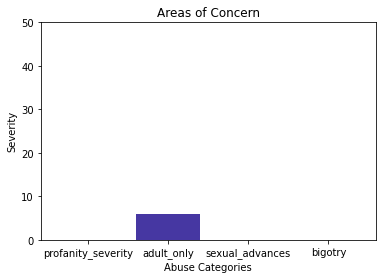

In [12]:
keys = data['abuse'].keys()
values = data['abuse'].values()

plt.bar(keys, values, color='#4637a2')
plt.ylim(0,50)
plt.xlabel('Abuse Categories')
plt.ylabel('Severity')
plt.title('Areas of Concern')
plt.show()

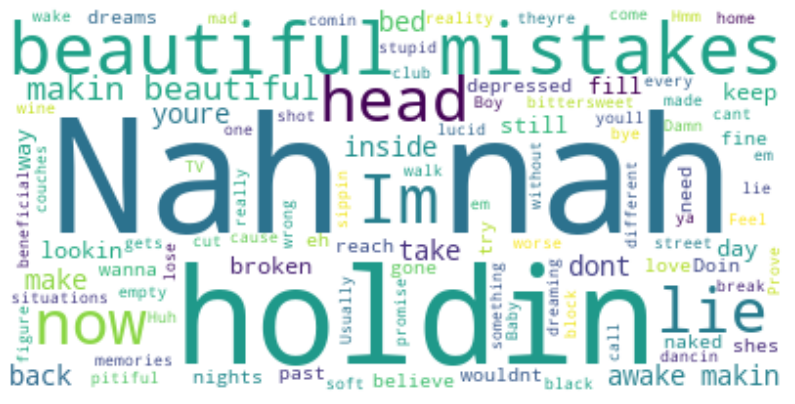

In [13]:
stop_words = ['got','let', 'ah', 'yeah', 'oh', 'ooh'] + list(STOPWORDS)

songs_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stop_words
)

# generate the word cloud
songs_wc.generate(data['lyrics'])

# display the word cloud
plt.figure(figsize=(14, 18))
plt.imshow(songs_wc, interpolation='bilinear')
plt.axis('off')
plt.show()